In [128]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 6)

In [183]:

x = np.linspace(-5, 5, 10)
y = x ** 2 + x + 5 * np.cos(x) + 6

first_red  = x[1], y[1]
second_red = x[2], y[2]

dx_arrow_1 = x[2] - x[1]
dy_arrow_1 = y[2] - y[1]

x_arrow_1 = []
x_arrow_1.append(first_red[0])
x_arrow_1.append(second_red[0])

y_arrow_1 = []
y_arrow_1.append(first_red[1])
y_arrow_1.append(second_red[1])


third_red  = x[3], y[3]
fourth_red = x[4], y[4]

dx_arrow_2 = x[3] - x[4]
dy_arrow_2 = y[3] - y[4]

x_arrow_2 = []
x_arrow_2.append(third_red[0])
x_arrow_2.append(fourth_red[0])

y_arrow_2 = []
y_arrow_2.append(third_red[1])
y_arrow_2.append(fourth_red[1])

dx_3 = x[3] - x[2]
dy_3 = y[3] - y[2]


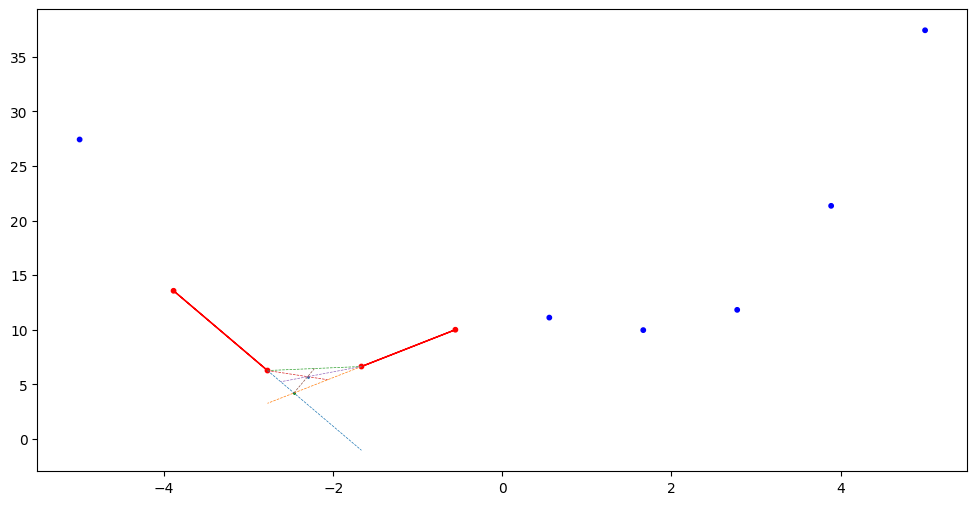

In [199]:
def compute_intersection(x1, y1, dx1, dy1, x2, y2, dx2, dy2):
    # Compute t1 and t2
    t1 = (x2 - x1 + dx2 * (y1 - y2) / dy2) / (dx1 - dx2 * dy1 / dy2)
    t2 = (y1 - y2 + t1 * dy1) / dy2
    
    # Compute the intersection point
    intersection_x = x1 + t1 * dx1
    intersection_y = y1 + t1 * dy1
    
    return intersection_x, intersection_y

inter = compute_intersection(second_red[0], second_red[1], dx_arrow_1, dy_arrow_1, third_red[0], third_red[1], dx_arrow_2, dy_arrow_2)
colors = ['red' if i in [1, 2, 3, 4] else 'blue' for i in range(len(x))]

fig, ax = plt.subplots()

ax.scatter(x, y, c = colors, s = 10)
arrow_1 = ax.arrow(first_red[0], first_red[1], dx_arrow_1, dy_arrow_1, color='red')
arrow_2 = ax.arrow(fourth_red[0], fourth_red[1], dx_arrow_2, dy_arrow_2, color='red')

# Draw a line from arrow tip
ax.plot((second_red[0], (second_red[0] + dx_arrow_1)), (second_red[1], (second_red[1] + dy_arrow_1)), linestyle = 'dashed', linewidth = 0.5)
ax.plot((third_red[0], (third_red[0] + dx_arrow_2)), (third_red[1], (third_red[1] + dy_arrow_2)), linestyle = 'dashed', linewidth = 0.5)
ax.plot((second_red[0], (second_red[0] + dx_3)), (second_red[1], (second_red[1] + dy_3)), linestyle = 'dashed', linewidth = 0.5)
plt.scatter(inter[0], inter[1], c = 'green', s = 1)

ax.plot((second_red[0], (inter[0] + third_red[0]) / 2), ((second_red[1], (inter[1] + third_red[1]) / 2)), linestyle = 'dashed', linewidth = 0.5)
ax.plot((third_red[0], (inter[0] + second_red[0]) / 2), ((third_red[1], (inter[1] + second_red[1]) / 2)), linestyle = 'dashed', linewidth = 0.5)
ax.plot((inter[0], (third_red[0] + second_red[0]) / 2), ((inter[1], (third_red[1] + second_red[1]) / 2)), linestyle = 'dashed', linewidth = 0.5)

baricenter_x = np.array((second_red[0] + third_red[0] + inter[0]) / 3).reshape(1)
baricenter_y = np.array((second_red[1] + third_red[1] + inter[1]) / 3).reshape(1)
ax.scatter(baricenter_x, baricenter_y, s = 1)

x_new = np.concatenate((x[:3], baricenter_x, x[3:]))
y_new = np.concatenate((y[:3], baricenter_y, y[3:]))

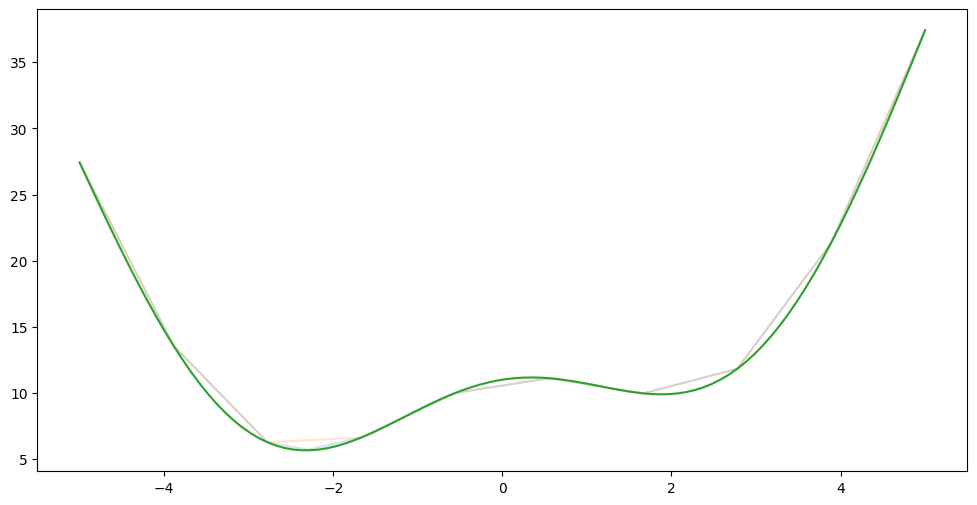

In [208]:

x_real = np.linspace(-5, 5, 100)
y_real = x_real ** 2 + x_real + 5 * np.cos(x_real) + 6

plt.plot(x_new, y_new, alpha = 0.2)
plt.plot(x, y, alpha = 0.2)
plt.plot(x_real, y_real, alpha = 1)
